# Hola Gustavo!

Mi nombre es David Bautista, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres.**

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div

¡Empecemos!

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# Comentario General
    
~~Hola Gustavo. Te felicito por el desarrollo del proyecto hasta el momento. Ahora bien, he dejado diferentes comentarios para que los puedas tener en cuenta para la siguiente entrega.~~
</div> 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
# Comentario General #2
    
Hola Gustavo. Te felicito por la culminación del proyecto. Muy buen trabajo.
</div> 

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from math import factorial
from scipy import stats as st
import math as mt
from datetime import datetime
import math
import pandas

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo cargando las librerías necesarias para el desarrollo del proyecto.
</div>

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
df_users = pd.read_csv('/datasets/megaline_users.csv', sep=',')
df_calls = pd.read_csv('/datasets/megaline_calls.csv', sep=',')
df_messages = pd.read_csv('/datasets/megaline_messages.csv', sep=',')
df_internet = pd.read_csv('/datasets/megaline_internet.csv', sep=',')
df_plans = pd.read_csv('/datasets/megaline_plans.csv', sep=',')

<div class="alert alert-block alert-success">
   <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo cargando los datos necesarios para el desarrollo del proyecto.
</div>

## Preparar los datos

In [3]:
#se muestran las diferentes base de datos para una visualizacion previa para establecer los ajustes pertinentes
display(df_users.head(10))
print()
display(df_calls.head(10))
print()
display(df_messages.head(10))
print()
display(df_internet.head(10))
print()
display(df_plans)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con este primer view de las tablas.
</div>

## Tarifas

In [4]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
df_plans.info()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes



In [5]:
# Imprime una muestra de los datos para las tarifas
display(df_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Se establece los datos generales y especificaciones de los planes y su estandar de cuando al costo, el tipo de las variables del dataframe de los planes esta alineado ya que este alimentara los demas data frame con el fin de establecer si los consumos estan dentro del rango, que son los que estan establecidos ya con un precio pactado, en caso contrario se debera de realizar los calculos establecidos de adicionales.
Se debe realizar modificacion a una misma unidad de medida para este caso seria a la variable mb_per_month_included que esta expresado en megabytes(mb) y se debe manejar en gigabytes(GB), adicional los datos de plan en GB deben se numero cerrado.
Se debe de realizar ajuste a la variable plan_name y unificar para ser una variable relacionable con el dataframe de los usuarios.

### Corregir datos

In [6]:
#por el momento no se realiza ajuste alguno a los datos presentados
df_plans['mb_per_month_included'] = (df_plans['mb_per_month_included']//1000)#Conversion de mb a GB y adicional de aproximar al minimo uso de "//"
df_plans['mb_per_month_included'] = df_plans['mb_per_month_included'].astype('int')#convertir la variable a entero
df_plans = df_plans.rename(columns = {"plan_name": "plan"})

display(df_plans)
print()
df_plans.info()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan                   2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


### Enriquecer los datos

In [7]:
#renombrar la columna a la unidad establecida de GB
df_plans = df_plans.rename(columns={'mb_per_month_included': 'gb_per_month_included'})#renombramiento de de encabezado ya con ajuste de medida
display(df_plans)

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo con esta primera exploración y modificaciones aplicadas para la tabla ``df_plans``.
</div>

## Usuarios/as

In [8]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
df_users.info()
df_users['state']=df_users['city'].str[-6:-4]
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB



In [9]:
# Imprime una muestra de datos para usuarios
display(df_users.sample(10))

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state
170,1170,Olin,Adkins,18,"Pittsburgh, PA MSA",2018-09-25,surf,NaN,PA
473,1473,Kirk,Velez,61,"Louisville/Jefferson County, KY-IN MSA",2018-12-31,surf,NaN,IN
198,1198,Russ,Horne,69,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-05-01,surf,NaN,PA
225,1225,Margarito,Barker,41,"Columbia, SC MSA",2018-06-07,surf,NaN,SC
205,1205,Rafael,Wade,43,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-05,surf,NaN,PA
334,1334,Donovan,Horton,34,"Seattle-Tacoma-Bellevue, WA MSA",2018-03-08,surf,NaN,WA
19,1019,Shizue,Landry,34,"Jacksonville, FL MSA",2018-01-16,surf,NaN,FL
295,1295,Hung,Flowers,68,"Kansas City, MO-KS MSA",2018-08-11,surf,NaN,KS
351,1351,Kyle,Grimes,47,"San Antonio-New Braunfels, TX MSA",2018-09-05,ultimate,NaN,TX
159,1159,Dierdre,Baker,58,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-07-21,ultimate,NaN,FL


- Se establece en el dataframe la informacion general de los usuarios.
- Al revisar la informacion de cada una de las variables del dataframe se establece algunas mejoras para los mismo, como realizar los ajustes a las varianles:
    - user_id: la cual esta identificada como un entero.
    - reg_date: se establece que al comienzo presenta un manejo de datos de tipo string o object, el cual como es una fecha 
    se debe de realizar su ajuste a tipo date, para poder realizar analisis de informacion, adicional se presenta que el 
    regirtro que realizaron los clientes fue en diferentes meses del año 2018, en donde tambien se deberia de realizar una
    separacion de la fecha para poder establecer mejores filtros de la informacion. Para esto se utilizaria .to_datetime,
    donde se focaliza el cambio de este tipo de variable.
     - Por ultimo se realizan ajustes como lo mencionado en punto anterior se realiza la particion de la fecha de forma que 
    se pueda manipular la informacion ya sea por año, mes o dia, para esto se utiliza el comando .strftime donde se 
    especifica que dato se requiere si el año, el mes o el dia.
    - churn_date: es la unica variable que presenta datos ausentes en donde esto hace referencia que la tarifa siguen en uso
    en el momento de la toma de estos datos. Estableciendo esto se pueden dejar los datos ausentes de esta forma para un 
    mejor control de los datos. Adicional este se puede extraer la cantidad de usuarios abandonaron esta tarifa, lo cual son 
    un total de 466 clientes activos y Se presenta un total de 34 clientes que ya presentan una fecha del abando de la 
    tarifa.

### Corregir los datos

In [10]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], errors="coerce")#se realiza ajuste para tipo de dato en fecha para su manipulacion.
display(df_users.head(10))
print()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,GA
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,WA
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,NV
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,OK
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,WA
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN,TX
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,CA
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN,MI
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,FL
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN,CA


### Enriquecer los datos

In [11]:
#Se realiza creacion de fila para las fechas
df_users['year'] = df_users['reg_date'].dt.strftime('%Y')
df_users['month'] = df_users['reg_date'].dt.strftime('%m')
df_users['day'] = df_users['reg_date'].dt.strftime('%d')
display(df_users.head(10))
print()
df_users.info()
print()
print("Se presenta la cantidad de ",df_users['user_id'].duplicated().sum(),"datos duplicados en esta información")#validacion si se encuentra informacion duplicada de usuarios 
print("Se cuenta con ", df_users['churn_date'].isnull().sum(), "clientes activos")#se establece cuantos clientes tienen plan y se puede establecer cuantos ya terminaron su plan.
print("Se presenta un total de",  500-(df_users['churn_date'].isnull().sum()), "clientes que ya no tienen servicio")
df_users['state']=df_users['city'].str[-6:-4]
df_users.describe()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,state,year,month,day
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,GA,2018,12,24
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,WA,2018,08,13
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,NV,2018,10,21
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,OK,2018,01,28
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,WA,2018,05,23
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN,TX,2018,11,29
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,CA,2018,11,27
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN,MI,2018,07,11
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,FL,2018,08,03
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN,CA,2018,04,22



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
 8   state       500 non-null    object        
 9   year        500 non-null    object        
 10  month       500 non-null    object        
 11  day         500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 47.0+ KB

Se presenta la cantidad de  0 datos duplicados en esta información
Se cuenta con  466 clientes activos
Se presenta un total de 34 clientes que ya no ti

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


<div class="alert alert-block alert-danger">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
~~Buen trabajo explorando la tabla ``df_users``, efectivamente el ideal es corregir el problema de los nulos en esta tabla.~~
 
~~Por otro lado, sería interesante que explores  aspectos estadísticos del contenido de la tabla usando métodos como ``describe()``.~~
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
validando esta base nos permite mostrar informacion estadistica de la tabla para toma de decisiones, permitiendo establecer minimo, media y maximo entre otros datos.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo.
</div>

## Llamadas

In [12]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Imprime una muestra de datos para las llamadas
display(df_calls.head(10))

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


El dataframe presenta lo siguiente:
    - call_date presenta un tipo de dato object el cual para su manipulacion no permitiria analisis, se deberia de ajustar
    para tener este tipo de variable en tipo fecha. Realizar el cambio mediante uso de comando .to_datetime la columna.
    - la variable id, puede generar confusión con los otros dataframe en este caso se deberia de ajustar para generar su 
    diferencia de los demas. Se utiliza el .rename para el cambio del nombre de la variable.
    - se establece que la duracion se debe de redondear y manerar en minutos para toda la columna de los datos duration. se 
    utiliza comando .apply(np.ceil) para redondear numero al siguiente digito.
    - Para una mejor manipulacion de los datos se debera de separar la fecha para un analisis mas detallado.

### Corregir los datos

In [14]:
#ajuste al dataframe, aproximacion a entero y cambio de tipo de la variable
df_calls['duration'] = df_calls['duration'].apply(np.ceil) #se aplica np.ceil para aproximar al minuto completo la columna de duracion
df_calls['duration'] = df_calls['duration'].astype('int') #convierte los datos a enteros
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], errors="coerce")#convertir datos a tipo fecha o date.


### Enriquecer los datos

In [15]:
df_calls['year'] = df_calls['call_date'].dt.strftime('%Y')
df_calls['month'] = df_calls['call_date'].dt.strftime('%m')
df_calls['day'] = df_calls['call_date'].dt.strftime('%d')
df_calls = df_calls.rename(columns={'id': 'id_calls'})
display(df_calls)

print()
print("Se presenta la cantidad de ",df_calls['id_calls'].duplicated().sum(),"registros de llamadas duplicados en esta información")#validacion si se encuentra informacion duplicada de usuarios
df_calls.describe()

,id_calls,user_id,call_date,duration,year,month,day
0,1000_93,1000,2018-12-27,9,2018,12,27
1,1000_145,1000,2018-12-27,14,2018,12,27
2,1000_247,1000,2018-12-27,15,2018,12,27
3,1000_309,1000,2018-12-28,6,2018,12,28
4,1000_380,1000,2018-12-30,5,2018,12,30
...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9,2018,11,21
137731,1499_200,1499,2018-10-20,11,2018,10,20
137732,1499_201,1499,2018-09-21,9,2018,09,21
137733,1499_202,1499,2018-10-10,1,2018,10,10



Se presenta la cantidad de  0 registros de llamadas duplicados en esta información


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,7.146673
std,139.416268,5.953919
min,1000.000000,0.000000
25%,1128.000000,2.000000
50%,1247.000000,6.000000
75%,1365.000000,11.000000
max,1499.000000,38.000000


<div class="alert alert-block alert-danger">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
~~Buen trabajo con la sección; sin embargo, hay algunos aspectos que se pueden tener en cuenta para mejorar el contenido de la misma.~~
    
- ~~No olvides usar metodos como ``describe()`` para explorar de mejor manera el contenido de la tabla.~~
    
 
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
validando en la base de datos de llamadas nos permite mostrar informacion estadistica general de los datos para toma de decisiones, permitiendo establecer minimo de minutos, media de minutos y maximo de minitus entre otros datos.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo.
</div>

## Mensajes

In [16]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
# Imprime una muestra de datos para los mensajes
display(df_messages.head(10))

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


El dataframe presenta lo siguiente:
    - message_date presenta un tipo de dato object el cual para su manipulacion no permitiria analisis, se deberia de 
    ajustar para tener este tipo de variable en tipo fecha. Realizar el cambio mediante uso de comando .to_datetime la 
    columna.
    - la variable id, puede generar confusión con las otras variables de los otros dataframe en este caso se deberia de
    ajustar para generar su diferencia de los demas. Se utiliza el .rename para el cambio del nombre de la variable.
    - Para una mejor manipulacion de los datos se debera de separar la fecha para un analisis mas detallado.

### Corregir los datos

In [18]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], errors="coerce")

### Enriquecer los datos

In [19]:
df_messages['year'] = df_messages['message_date'].dt.strftime('%Y')
df_messages['month'] = df_messages['message_date'].dt.strftime('%m')
df_messages['day'] = df_messages['message_date'].dt.strftime('%d')
df_messages = df_messages.rename(columns={'id': 'id_messages'})
display(df_messages)
print()
df_messages.info()
print()
print("Se presenta la cantidad de ",df_messages['id_messages'].duplicated().sum(),"registros de mensajes duplicados en esta información")#validacion si se encuentra informacion duplicada de usuarios 
df_messages.describe()

,id_messages,user_id,message_date,year,month,day
0,1000_125,1000,2018-12-27,2018,12,27
1,1000_160,1000,2018-12-31,2018,12,31
2,1000_223,1000,2018-12-31,2018,12,31
3,1000_251,1000,2018-12-27,2018,12,27
4,1000_255,1000,2018-12-26,2018,12,26
...,...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,2018,12,24
76047,1497_536,1497,2018-12-24,2018,12,24
76048,1497_547,1497,2018-12-31,2018,12,31
76049,1497_558,1497,2018-12-24,2018,12,24



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_messages   76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   year          76051 non-null  object        
 4   month         76051 non-null  object        
 5   day           76051 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 3.5+ MB

Se presenta la cantidad de  0 registros de mensajes duplicados en esta información


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


<div class="alert alert-block alert-danger">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
~~Buen trabajo explorando la tabla ``df_messages``, lo único que mejoraría la sección, como en los casos anteriores, es el uso de un ``describe()``.~~
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
validando en la base de datos de mensajes nos permite mostrar informacion estadistica general de los datos para toma de decisiones, permitiendo establecer minimo de mensajes que tuvo el cliente, media de mensajes y maximo de mensajes entre otros datos.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>

## Internet

In [20]:
# Imprime la información general/resumida sobre el DataFrame de internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
# Imprime una muestra de datos para el tráfico de internet
display(df_internet.head(10))

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


El dataframe presenta lo siguiente:
    - session_date presenta un tipo de dato object el cual para su manipulacion no permitiria analisis, se deberia de 
    ajustar para tener este tipo de variable en tipo fecha. Realizar el cambio mediante uso de comando .to_datetime la 
    columna.
    - la variable id, puede generar confusión con las otras variables de los otros dataframe en este caso se deberia de
    ajustar para generar su diferencia de los demas. Se utiliza el .rename para el cambio del nombre de la variable.
    - Para una mejor manipulacion de los datos se debera de separar la fecha para un analisis mas detallado.
    - para el ajuste del consumo se debe tener presente que no se realizara un redondeo de forma individual a las sesiones
    este ajuste se realizara de forma mensual aproximando a siguiente digito.

### Corregir los datos

In [22]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], errors="coerce")

### Enriquecer los datos

In [23]:
df_internet['year'] = df_internet['session_date'].dt.strftime('%Y')
df_internet['month'] = df_internet['session_date'].dt.strftime('%m')
df_internet['day'] = df_internet['session_date'].dt.strftime('%d')
df_internet = df_internet.rename(columns={'id': 'id_internet'})
df_internet['mb_used'] = df_internet['mb_used']/1000
df_internet = df_internet.rename(columns={'mb_used': 'gb_used'})
display(df_internet)
df_internet.info()
print()
print("Se presenta la cantidad de ",df_internet['id_internet'].duplicated().sum(),"registros de sesiones duplicadas en esta información")#validacion si se encuentra informacion duplicada de usuarios 
print()
df_internet.describe()

,id_internet,user_id,session_date,gb_used,year,month,day
0,1000_13,1000,2018-12-29,0.08986,2018,12,29
1,1000_204,1000,2018-12-31,0.00000,2018,12,31
2,1000_379,1000,2018-12-28,0.66040,2018,12,28
3,1000_413,1000,2018-12-26,0.27099,2018,12,26
4,1000_442,1000,2018-12-27,0.88022,2018,12,27
...,...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,0.21806,2018,10,20
104821,1499_216,1499,2018-12-30,0.30472,2018,12,30
104822,1499_217,1499,2018-09-22,0.29275,2018,09,22
104823,1499_218,1499,2018-12-07,0.00000,2018,12,07


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id_internet   104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   gb_used       104825 non-null  float64       
 4   year          104825 non-null  object        
 5   month         104825 non-null  object        
 6   day           104825 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 5.6+ MB

Se presenta la cantidad de  0 registros de sesiones duplicadas en esta información



,user_id,gb_used
count,104825.000000,104825.000000
mean,1242.496361,0.366714
std,142.053913,0.277171
min,1000.000000,0.000000
25%,1122.000000,0.136080
50%,1236.000000,0.343980
75%,1367.000000,0.554610
max,1499.000000,1.693470


<div class="alert alert-block alert-danger">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
~~Buen trabajo con la sección; nuevamente, mi única observación es agregar el uso del método ``describe()`` para estudiar aspectos estadísticos de la tabla.~~
    
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
validando en la base de datos de cosumos de datos nos permite mostrar informacion estadistica general de los datos para toma de decisiones, permitiendo establecer minimo de consumo de datos que tuvo el cliente, media de datos de consumo y maximo de datos de consumos entre otros datos.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>

## Estudiar las condiciones de las tarifas

In [24]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
display(df_plans)


,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15,500,20,10,0.03,0.03,surf
1,1000,30,3000,70,7,0.01,0.01,ultimate


<div class="alert alert-block alert-danger">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>

~~Sería interesante que se generarán conclusiones intermedias de esta sección.~~
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
A nivel general a especifico se establecen los parametros basicos que contiene los dos planes.
Determinando el pago normal y que servicios tiene establecido cada cliente adicional presenta en caso de sobrepasar los consumos asignados, cuales son los cargos adicionales y bajo que medida estan basados.
Con base a los datos establecidos en cada uno de las tablas arriba se puede realizar el cruce de informacion con el fin de establecer, cuales son los pagos adicionales que los clientes deben realizar.
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo.
</div>

## Agregar datos por usuario

In [25]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
qqcallxuser = df_calls.pivot_table(index='user_id', #la columna cuyos valores se convierten en índices en la tabla dinámica;
                            columns='month', #la columna cuyos valores se convierten en columnas en la tabla dinámica;
                            values='duration', #la columna cuyos valores queremos agregar en la tabla dinámica;
                            aggfunc='count', #la función de agregación que queremos aplicar a los valores en cada grupo de filas y columnas.
                           fill_value = 0, #rellenar los valores ausentes con 0
                                     margins=True #realiza una sumatoria compilada
                                 )
print("Tabla de cantidad de llamadas por usuario en cada mes")
print()
display(qqcallxuser)#muestra la pivot table
print()
print("Tabla con una muestra en especifico")
print()
display(qqcallxuser[(qqcallxuser.index==1104)])
print()
print("Tabla del dataframe original de una muestra especifica")
display(df_calls[df_calls['user_id']==1104])#se escoge un valor de muestra para comprobacion

Tabla de cantidad de llamadas por usuario en cada mes



month,01,02,03,04,05,06,07,08,09,10,11,12,All
user_id,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,16,16
1001,0,0,0,0,0,0,0,27,49,65,64,56,261
1002,0,0,0,0,0,0,0,0,0,11,55,47,113
1003,0,0,0,0,0,0,0,0,0,0,0,149,149
1004,0,0,0,0,21,44,49,49,42,61,54,50,370
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,0,0,0,0,0,0,0,18,52,46,39,40,195
1497,0,0,0,0,0,0,0,0,0,0,0,54,54
1498,0,37,37,47,35,37,43,44,45,46,41,39,451



Tabla con una muestra en especifico



month,01,02,03,04,05,06,07,08,09,10,11,12,All
user_id,,,,,,,,,,,,,
1104,0,0,0,0,0,0,0,0,0,0,0,4,4



Tabla del dataframe original de una muestra especifica


,id_calls,user_id,call_date,duration,year,month,day
27445,1104_2,1104,2018-12-28,1,2018,12,28
27446,1104_3,1104,2018-12-30,7,2018,12,30
27447,1104_8,1104,2018-12-29,3,2018,12,29
27448,1104_11,1104,2018-12-31,0,2018,12,31


In [26]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
qmincallxuser = df_calls.pivot_table(index='user_id', #la columna cuyos valores se convierten en índices en la tabla dinámica;
                            columns='month', #la columna cuyos valores se convierten en columnas en la tabla dinámica;
                            values='duration', #la columna cuyos valores queremos agregar en la tabla dinámica;
                            aggfunc='sum', #la función de agregación que queremos aplicar a los valores en cada grupo de filas y columnas.
                           fill_value = 0, #rellenar los valores ausentes con 0
                                     margins=True #realiza una sumatoria compilada
                                 )
print("Tabla de cantidad de minutos por usuario en cada mes")
print()
display(qmincallxuser)#muestra la pivot table 
print()
print("Tabla con una muestra en especifico")
print()
display(qmincallxuser[(qmincallxuser.index==1104)]) #muestra el valor seleccionado
print()
print("Tabla del dataframe original de una muestra especifica")
print()
display(df_calls[df_calls['user_id']==1104])

Tabla de cantidad de minutos por usuario en cada mes



month,01,02,03,04,05,06,07,08,09,10,11,12,All
user_id,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,124,124
1001,0,0,0,0,0,0,0,182,315,393,426,412,1728
1002,0,0,0,0,0,0,0,0,0,59,386,384,829
1003,0,0,0,0,0,0,0,0,0,0,0,1104,1104
1004,0,0,0,0,193,275,381,354,301,365,476,427,2772
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,0,0,0,0,0,0,0,122,414,317,308,294,1455
1497,0,0,0,0,0,0,0,0,0,0,0,300,300
1498,0,244,266,365,288,238,321,266,363,298,223,339,3211



Tabla con una muestra en especifico



month,01,02,03,04,05,06,07,08,09,10,11,12,All
user_id,,,,,,,,,,,,,
1104,0,0,0,0,0,0,0,0,0,0,0,11,11



Tabla del dataframe original de una muestra especifica



,id_calls,user_id,call_date,duration,year,month,day
27445,1104_2,1104,2018-12-28,1,2018,12,28
27446,1104_3,1104,2018-12-30,7,2018,12,30
27447,1104_8,1104,2018-12-29,3,2018,12,29
27448,1104_11,1104,2018-12-31,0,2018,12,31


In [27]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
qmessxuser = df_messages.pivot_table(index='user_id', #la columna cuyos valores se convierten en índices en la tabla dinámica;
                            columns='month', #la columna cuyos valores se convierten en columnas en la tabla dinámica;
                            values='year', #la columna cuyos valores queremos agregar en la tabla dinámica;
                            aggfunc='count', #la función de agregación que queremos aplicar a los valores en cada grupo de filas y columnas.
                           fill_value = 0, #rellenar los valores ausentes con 0
                                     margins=True #realiza una sumatoria compilada
                                 )
print("Tabla de cantidad de mensajes por usuario en cada mes")
print()
display(qmessxuser)
print()
print("Tabla con una muestra en especifico")
print()
display(qmessxuser[(qmessxuser.index==1481)])
print()
print("Tabla del dataframe original de una muestra especifica")
print()
display(df_messages[df_messages['user_id']==1481])#se escoge un valor de muestra para comprobacion


Tabla de cantidad de mensajes por usuario en cada mes



month,01,02,03,04,05,06,07,08,09,10,11,12,All
user_id,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,0,11,11
1001,0,0,0,0,0,0,0,30,44,53,36,44,207
1002,0,0,0,0,0,0,0,0,0,15,32,41,88
1003,0,0,0,0,0,0,0,0,0,0,0,50,50
1004,0,0,0,0,7,18,26,25,21,24,25,31,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,0,0,0,0,0,0,0,0,11,29,31,37,108
1494,0,0,0,0,0,0,20,27,21,38,35,33,174
1496,0,0,0,0,0,0,0,2,21,18,13,11,65



Tabla con una muestra en especifico



month,01,02,03,04,05,06,07,08,09,10,11,12,All
user_id,,,,,,,,,,,,,
1481,0,0,0,0,0,0,0,0,0,0,0,3,3



Tabla del dataframe original de una muestra especifica



,id_messages,user_id,message_date,year,month,day
74584,1481_9,1481,2018-12-28,2018,12,28
74585,1481_38,1481,2018-12-28,2018,12,28
74586,1481_50,1481,2018-12-29,2018,12,29


In [28]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
qinterxuser = df_internet.pivot_table(index='user_id', #la columna cuyos valores se convierten en índices en la tabla dinámica;
                            columns='month', #la columna cuyos valores se convierten en columnas en la tabla dinámica;
                            values='gb_used', #la columna cuyos valores queremos agregar en la tabla dinámica;
                            aggfunc='sum', #la función de agregación que queremos aplicar a los valores en cada grupo de filas y columnas.
                           fill_value = 0, #rellenar los valores ausentes con 0
                                     margins=True#realiza una sumatoria compilada
                                 )
qinterxuser=qinterxuser.apply(np.ceil)
print("Tabla de consumo de internet por usuario en cada mes")
print()
display(qinterxuser)#muestra la pivot table
print()
print("Tabla con una muestra en especifico")
print()
display(qinterxuser[(qinterxuser.index==1323)])
print()
print("Tabla del dataframe original de una muestra especifica")
display(df_internet[df_internet['user_id']==1323])#se escoge un valor de muestra para comprobacion

Tabla de consumo de internet por usuario en cada mes



month,01,02,03,04,05,06,07,08,09,10,11,12,All
user_id,,,,,,,,,,,,,
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,14.0,23.0,19.0,20.0,81.0
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,20.0,15.0,41.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,28.0
1004,0.0,0.0,0.0,0.0,7.0,21.0,25.0,28.0,19.0,15.0,22.0,22.0,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,17.0,15.0,9.0,17.0,65.0
1497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,12.0
1498,0.0,20.0,20.0,20.0,23.0,15.0,25.0,21.0,23.0,21.0,20.0,24.0,228.0



Tabla con una muestra en especifico



month,01,02,03,04,05,06,07,08,09,10,11,12,All
user_id,,,,,,,,,,,,,
1323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0



Tabla del dataframe original de una muestra especifica


,id_internet,user_id,session_date,gb_used,year,month,day
69286,1323_10,1323,2018-12-31,0.04427,2018,12,31
69287,1323_251,1323,2018-12-31,0.46773,2018,12,31
69288,1323_349,1323,2018-12-31,0.51285,2018,12,31


<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo creando las diferentes tablas agrupadas para realizar los cálculos correspondientes.
</div>

In [29]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
df_calls.insert(1, "service", "qcall")
df_calls.insert(2, "qcallsed", 1)
cll1=df_calls
calls1=cll1.groupby(by=["user_id","month", "service"])['duration'].sum()
display(calls1.head(10))

print()
cll2 = cll1.replace('qcall', 'qmin') 
calls2=cll2.groupby(by=["user_id","month", "service"])['duration'].count()
display(calls2.head(10))

print()
df_messages.insert(1, "service", "qmss")
df_messages.insert(2, "qmessage", 1)
mess=df_messages.groupby(by=["user_id","month", "service"])['message_date'].count()
display(mess)

print()
df_internet.insert(1, "service", "qint")
inte=df_internet.groupby(by=["user_id","month", "service"])['gb_used'].sum().apply(np.ceil)
display(inte.head(10))

print()
df_m = pd.merge(calls2, calls1, on=["user_id", "month"], how="left").merge(mess, on=["user_id", "month"], how="left").merge(inte, on=["user_id", "month"], how="left")
df_m = df_m.rename(columns = {"duration_y": "Minutesxmonth", "duration_x": "Qcallxmonth", "message_date": "messagexmonth", "gb_used": "gbxmonth"})

display(df_m.head(15))
#display(df_m2.head(15))


user_id  month  service
1000     12     qcall       124
1001     08     qcall       182
         09     qcall       315
         10     qcall       393
         11     qcall       426
         12     qcall       412
1002     10     qcall        59
         11     qcall       386
         12     qcall       384
1003     12     qcall      1104
Name: duration, dtype: int64

user_id  month  service
1000     12     qmin        16
1001     08     qmin        27
         09     qmin        49
         10     qmin        65
         11     qmin        64
         12     qmin        56
1002     10     qmin        11
         11     qmin        55
         12     qmin        47
1003     12     qmin       149
Name: duration, dtype: int64

user_id  month  service
1000     12     qmss       11
1001     08     qmss       30
         09     qmss       44
         10     qmss       53
         11     qmss       36
                           ..
1496     09     qmss       21
         10     qmss       18
         11     qmss       13
         12     qmss       11
1497     12     qmss       50
Name: message_date, Length: 1806, dtype: int64

user_id  month  service
1000     12     qint        2.0
1001     08     qint        7.0
         09     qint       14.0
         10     qint       23.0
         11     qint       19.0
         12     qint       20.0
1002     10     qint        7.0
         11     qint       20.0
         12     qint       15.0
1003     12     qint       28.0
Name: gb_used, dtype: float64

Qcallxmonth  Minutesxmonth  messagexmonth  gbxmonth
user_id month                                                     
1000    12              16            124           11.0       2.0
1001    08              27            182           30.0       7.0
        09              49            315           44.0      14.0
        10              65            393           53.0      23.0
        11              64            426           36.0      19.0
        12              56            412           44.0      20.0
1002    10              11             59           15.0       7.0
        11              55            386           32.0      20.0
        12              47            384           41.0      15.0
1003    12             149           1104           50.0      28.0
1004    05              21            193            7.0       7.0
        06              44            275           18.0      21.0
        07              49            381           26.0      25.0
        08              49            354           25.0      28.0
        09              42            301           21.0      19.0

In [30]:
# Añade la información de la tarifa

#unificacion de datos de usuarios y tarifas del plan
df_plxus=pd.merge(df_users, df_plans, on="plan")
#display(df_plxus.head(10))

#_______________________________________________________________________________________________cant llamadas

#unificacion de datos de llamadas y (usuarios y tarifas)
ll1=pd.merge(df_calls, df_plxus, on="user_id", how="left")
ll2=ll1.groupby(by=["user_id","month_x", "service", "plan"]).agg(usd_monthly_pay=('usd_monthly_pay', max), Qcallsxmonth=('qcallsed', sum))
#m2=pd.DataFrame(m2)

#muestra el resultado
#display(ll2)
#display(ll1)

#_______________________________________________________________________________________________llamadas

#unificacion de datos de llamadas y (usuarios y tarifas)
l1=pd.merge(df_calls, df_plxus, on="user_id", how="left")
l2=l1.groupby(by=["user_id","month_x", "service", "plan"]).agg(Minutesxmonth=('duration', sum), minutes_included=('minutes_included', max), usd_per_minute=("usd_per_minute", max))
#m2=pd.DataFrame(m2)

#definicion de funcion para evaluar si los minutos estan dentro del rango del plan establecido si no se establece un valor adcional
def adcostmin(row):
    result= 0
    if row["Minutesxmonth"] > row["minutes_included"]:
        result = ((row['Minutesxmonth']-row['minutes_included'])*row['usd_per_minute'])
    else:
        0
    return result

#aplicacion de funcion
l2['ad_minut'] = l2.apply(adcostmin, axis=1)

#muestra el resultado
#display(l2)
#muestra valores para los que son minutos superirores a 500 min
#display(l2[l2['duration']>500])

#_______________________________________________________________________________________________mensajes

#unificacion de datos de mesanje y (usuarios y tarifas)
m1=pd.merge(df_messages, df_plxus, on="user_id", how="left")
#display(m1)
m2=m1.groupby(by=["user_id","month_x", "service", "plan"]).agg(messagexmonth=('qmessage', sum), messages_included=('messages_included', max), usd_per_message=("usd_per_message", max)).fillna(0)
#display(m2)
#m2=pd.DataFrame(m2)


#definicion de funcion para evaluar si los minutos estan dentro del rango del plan establecido si no se establece un valor adcional
def adcostmess(row):
    result= 0
    if row["messagexmonth"] > row["messages_included"]:
        result = ((row['messagexmonth']-row['messages_included'])*row['usd_per_message'])
    else:
        0
    return result

#aplicacion de funcion
m2['ad_message'] = m2.apply(adcostmess, axis=1)

#muestra el resultado
#display(m2)
#muestra valores para los que son minutos superirores a 500 min
#display(m2[m2['message_date']>50])

#_______________________________________________________________________________________________internet

#unificacion de datos de internet y (usuarios y tarifas)
i1=pd.merge(df_internet, df_plxus, on="user_id", how="left")
#display(i1)
i2=i1.groupby(by=["user_id","month_x", "service", "plan"]).agg(gbxmonth=('gb_used', sum), gb_per_month_included=('gb_per_month_included', max), usd_per_gb=("usd_per_gb", max)).apply(np.ceil)
#display(i2)
#m2=pd.DataFrame(m2)


#definicion de funcion para evaluar si los minutos estan dentro del rango del plan establecido si no se establece un valor adcional
def adcostint(row):
    result= 0
    if row["gbxmonth"] > row["gb_per_month_included"]:
        result = ((row['gbxmonth']-row['gb_per_month_included'])*row['usd_per_gb'])
    else:
        0
    return result

#aplicacion de funcion
i2['ad_internet'] = i2.apply(adcostint, axis=1)

#muestra el resultado
#display(i2)
#muestra valores para los que son minutos superirores a 500 min
#display(i2[i2['gb_used']>15])

#_______________________________________________________________________________________________unificacion tarifas

print()
df_ttinf = pd.merge(ll2, l2, on=["user_id", "month_x", "plan"], how="left").merge(m2, on=["user_id", "month_x", "plan"], how="left").merge(i2, on=["user_id", "month_x", "plan"], how="left").fillna(0)
#df_ttinf = df_ttinf.rename(columns = {"qcallsed": "Qcallxmonth", "duration": "Minutesxmonth", "message_date": "messagexmonth", "gb_used": "gbxmonth"})

display(df_ttinf)


usd_monthly_pay  Qcallsxmonth  Minutesxmonth  \
user_id month_x plan                                                     
1000    12      ultimate               70            16            124   
1001    08      surf                   20            27            182   
        09      surf                   20            49            315   
        10      surf                   20            65            393   
        11      surf                   20            64            426   
...                                   ...           ...            ...   
1498    12      surf                   20            39            339   
1499    09      surf                   20            41            346   
        10      surf                   20            53            385   
        11      surf                   20            45            308   
        12      surf                   20            65            496   

                          minutes_included  usd_per_minute  ad_minut  \
user_id month_x plan                                                   
1000    12      ultimate              3000            0.01       0.0   
1001    08      surf                   500            0.03       0.0   
        09      surf                   500            0.03       0.0   
        10      surf                   500            0.03       0.0   
        11      surf                   500            0.03       0.0   
...                                    ...             ...       ...   
1498    12      surf                   500            0.03       0.0   
1499    09      surf                   500            0.03       0.0   
        10      surf                   500            0.03       0.0   
        11      surf                   500            0.03       0.0   
        12      surf                   500            0.03       0.0   

                          messagexmonth  messages_included  usd_per_message  \
user_id month_x plan                                                          
1000    12      ultimate           11.0             1000.0             0.01   
1001    08      surf               30.0               50.0             0.03   
        09      surf               44.0               50.0             0.03   
        10      surf               53.0               50.0             0.03   
        11      surf               36.0               50.0             0.03   
...                                 ...                ...              ...   
1498    12      surf                0.0                0.0             0.00   
1499    09      surf                0.0                0.0             0.00   
        10      surf                0.0                0.0             0.00   
        11      surf                0.0                0.0             0.00   
        12      surf                0.0                0.0             0.00   

                          ad_message  gbxmonth  gb_per_month_included  \
user_id month_x plan                                                    
1000    12      ultimate        0.00       2.0                   30.0   
1001    08      surf            0.00       7.0                   15.0   
        09      surf            0.00      14.0                   15.0   
        10      surf            0.09      23.0                   15.0   
        11      surf            0.00      19.0                   15.0   
...                              ...       ...                    ...   
1498    12      surf            0.00      24.0                   15.0   
1499    09      surf            0.00      13.0                   15.0   
        10      surf            0.00      20.0                   15.0   
        11      surf            0.00      17.0                   15.0   
        12      surf            0.00      23.0                   15.0   

                          usd_per_gb  ad_internet  
user_id month_x plan                               
1000    12      ultimate         7.0        

In [31]:
# Calcula el ingreso mensual para cada usuario
print("""Datos de informacion general donde se presenta consumo que tiene cada uno de los usuarios en los diferentes meses 
y el consumo que se presenta en cada uno de los servicios dependiendo de cada pla""")
print()
df_ttinf['costtoxmonth'] = df_ttinf['usd_monthly_pay']+df_ttinf['ad_minut']+df_ttinf['ad_message']+df_ttinf['ad_internet']
display(df_ttinf)
print()
df_ttinfadj = df_ttinf.reindex(['costtoxmonth', 'usd_monthly_pay', 'ad_minut', 'ad_message', 'ad_internet'], axis=1)
print("""Tabla resumen donde se muestra solo los ingresos por usuario, incluyendo los consumos adcionales en los planes""")
print()
display(df_ttinfadj.head(15))
print()
costxuser=df_ttinfadj.groupby(by=["user_id"]).agg(costtoxmonth=('costtoxmonth', sum))
print("""Tabla de ingresos por cada uno de los usuarios de forma anualizada""")
print()
display(costxuser)

Datos de informacion general donde se presenta consumo que tiene cada uno de los usuarios en los diferentes meses 
y el consumo que se presenta en cada uno de los servicios dependiendo de cada pla



usd_monthly_pay  Qcallsxmonth  Minutesxmonth  \
user_id month_x plan                                                     
1000    12      ultimate               70            16            124   
1001    08      surf                   20            27            182   
        09      surf                   20            49            315   
        10      surf                   20            65            393   
        11      surf                   20            64            426   
...                                   ...           ...            ...   
1498    12      surf                   20            39            339   
1499    09      surf                   20            41            346   
        10      surf                   20            53            385   
        11      surf                   20            45            308   
        12      surf                   20            65            496   

                          minutes_included  usd_per_minute  ad_minut  \
user_id month_x plan                                                   
1000    12      ultimate              3000            0.01       0.0   
1001    08      surf                   500            0.03       0.0   
        09      surf                   500            0.03       0.0   
        10      surf                   500            0.03       0.0   
        11      surf                   500            0.03       0.0   
...                                    ...             ...       ...   
1498    12      surf                   500            0.03       0.0   
1499    09      surf                   500            0.03       0.0   
        10      surf                   500            0.03       0.0   
        11      surf                   500            0.03       0.0   
        12      surf                   500            0.03       0.0   

                          messagexmonth  messages_included  usd_per_message  \
user_id month_x plan                                                          
1000    12      ultimate           11.0             1000.0             0.01   
1001    08      surf               30.0               50.0             0.03   
        09      surf               44.0               50.0             0.03   
        10      surf               53.0               50.0             0.03   
        11      surf               36.0               50.0             0.03   
...                                 ...                ...              ...   
1498    12      surf                0.0                0.0             0.00   
1499    09      surf                0.0                0.0             0.00   
        10      surf                0.0                0.0             0.00   
        11      surf                0.0                0.0             0.00   
        12      surf                0.0                0.0             0.00   

                          ad_message  gbxmonth  gb_per_month_included  \
user_id month_x plan                                                    
1000    12      ultimate        0.00       2.0                   30.0   
1001    08      surf            0.00       7.0                   15.0   
        09      surf            0.00      14.0                   15.0   
        10      surf            0.09      23.0                   15.0   
        11      surf            0.00      19.0                   15.0   
...                              ...       ...                    ...   
1498    12      surf            0.00      24.0                   15.0   
1499    09      surf            0.00      13.0                   15.0   
        10      surf            0.00      20.0                   15.0   
        11      surf            0.00      17.0                   15.0   
        12      surf            0.00      23.0                   15.0   

                          usd_per_gb  ad_internet  costtoxmonth  
user_id month_x plan                                             
1000    12      


Tabla resumen donde se muestra solo los ingresos por usuario, incluyendo los consumos adcionales en los planes



costtoxmonth  usd_monthly_pay  ad_minut  ad_message  \
user_id month_x plan                                                            
1000    12      ultimate         70.00               70      0.00        0.00   
1001    08      surf             20.00               20      0.00        0.00   
        09      surf             20.00               20      0.00        0.00   
        10      surf            100.09               20      0.00        0.09   
        11      surf             60.00               20      0.00        0.00   
        12      surf             70.00               20      0.00        0.00   
1002    10      surf             20.00               20      0.00        0.00   
        11      surf             70.00               20      0.00        0.00   
        12      surf             20.00               20      0.00        0.00   
1003    12      surf            168.12               20     18.12        0.00   
1004    05      surf             20.00               20      0.00        0.00   
        06      surf             80.00               20      0.00        0.00   
        07      surf            120.00               20      0.00        0.00   
        08      surf            150.00               20      0.00        0.00   
        09      surf             60.00               20      0.00        0.00   

                          ad_internet  
user_id month_x plan                   
1000    12      ultimate          0.0  
1001    08      surf              0.0  
        09      surf              0.0  
        10      surf             80.0  
        11      surf             40.0  
        12      surf             50.0  
1002    10      surf              0.0  
        11      surf             50.0  
        12      surf              0.0  
1003    12      surf            130.0  
1004    05      surf              0.0  
        06      surf             60.0  
        07      surf            100.0  
        08      surf            130.0  
        09      surf             40.0


Tabla de ingresos por cada uno de los usuarios de forma anualizada



,costtoxmonth
user_id,
1000,70.00
1001,270.09
1002,110.00
1003,168.12
1004,630.00
...,...
1495,483.30
1496,140.00
1497,70.00


<div class="alert alert-block alert-danger">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>

~~Buen trabajo con los merge y la estructuración de la tabla, ten en cuenta que sería interesante que se generarán conclusiones intermedias de esta sección, comentando la lógica de cada cruce.~~</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
A nivel general partiendo de una vision global a una especifica se establece lo siguiente:
    a. la primera tabla evidencia una visual general de cada uno de los clientes con sus respectivos planes y se realiza
    visualizacion de todos los consumos que se tuvieron en cada uno de los diferentes servicios que cuentas los planes,
    adicional se presenta el comparativo de cuanto adicional de ingresos tuvieron en cada servicio por exceder los consumos
    permitidos y se compacta todos en un resumen total por usuario, mes.
    
    b. La segunda tabla realiza un enfoque mas reducido de informacion solo enfocando los datos de usuarios por mes y los
    ingresos adicionales por cada uno de los servicios.
    
    c. La ultima tabla realiza es un resumen anualizado de los ingresos que tuvieron cada uno de los clientes y su 
    comportamiento de consumo.
    
Validando y realizando los diferentes enfoque esto permitira el analisis respectivos de los datos.
    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Excelente, buen trabajo Gustavo.
</div>

## Estudia el comportamiento de usuario

### Llamadas

Minutesxmonth
month_x plan                   
01      surf         203.000000
        ultimate     193.500000
02      surf         297.000000
        ultimate     470.333333
03      surf         330.000000
        ultimate     304.250000
04      surf         351.540000
        ultimate     336.857143
05      surf         410.240000
        ultimate     406.241379
06      surf         435.791667
        ultimate     387.444444
07      surf         453.733333
        ultimate     427.067797
08      surf         417.849057
        ultimate     421.436620
09      surf         420.732984
        ultimate     437.511628
10      surf         438.991379
        ultimate     455.028571
11      surf         432.494585
        ultimate     448.730159
12      surf         484.501608
        ultimate     465.261745

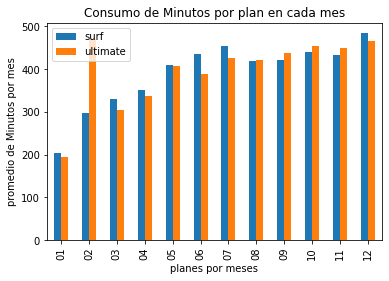

In [32]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

df_ttinfcall = df_ttinf.reindex(['Minutesxmonth'], axis=1)
#display(df_ttinfcall.head(15))

df_ttinfcall1=df_ttinfcall.groupby(by=["month_x", "plan"])['Minutesxmonth'].mean()
df_ttinfcall1=pd.DataFrame(df_ttinfcall1)
display(df_ttinfcall1)

ex1 = df_ttinfcall.pivot_table(index='month_x', #la columna cuyos valores se convierten en índices en la tabla dinámica;
                            columns='plan', #la columna cuyos valores se convierten en columnas en la tabla dinámica;
                            values='Minutesxmonth', #la columna cuyos valores queremos agregar en la tabla dinámica;
                            aggfunc='mean' #la función de agregación que queremos aplicar a los valores en cada grupo de filas y columnas.
                           )


ex1.plot(
        kind='bar',
        title='Consumo de Minutos por plan en cada mes',
        xlabel='planes por meses',
        ylabel='promedio de Minutos por mes')

plt.legend(['surf', 'ultimate'])
plt.show()

plan,surf,ultimate
month_x,,
01,60,112
02,366,408
03,1068,552
04,2444,998
05,4289,1670
06,5769,2452
07,7642,3463
08,9325,4265
09,11273,5250


Qcallsxmonth
month_x plan                  
01      surf                60
        ultimate           112
02      surf               366
        ultimate           408
03      surf              1068
        ultimate           552
04      surf              2444
        ultimate           998
05      surf              4289
        ultimate          1670
06      surf              5769
        ultimate          2452
07      surf              7642
        ultimate          3463
08      surf              9325
        ultimate          4265
09      surf             11273
        ultimate          5250
10      surf             14303
        ultimate          6761
11      surf             16731
        ultimate          7920
12      surf             20814
        ultimate          9800

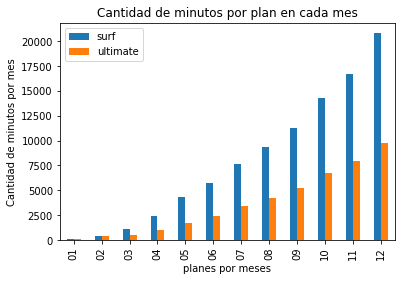

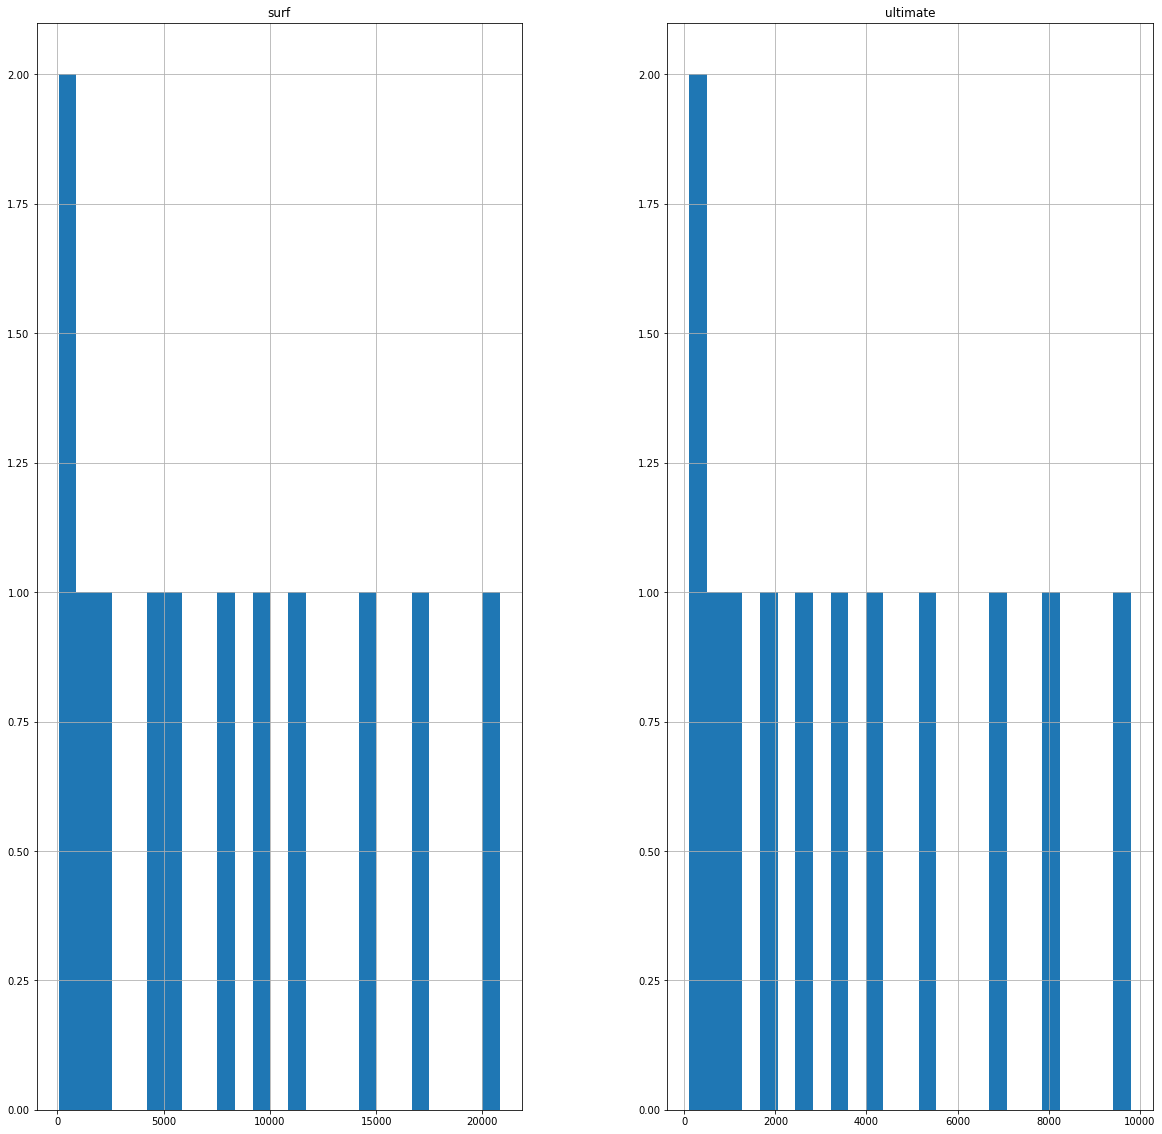

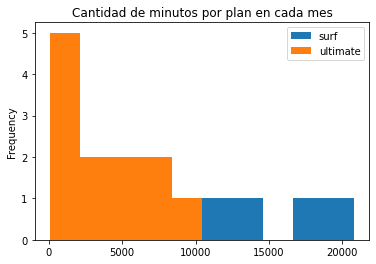

In [33]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
#df_ttinfcall2 = df_ttinf.reindex(['Minutesxmonth'], axis=1)

#display(df_ttinfcall2.head(15))

#ex2 = df_ttinfcall2.pivot_table(index='user_id', #la columna cuyos valores se convierten en índices en la tabla dinámica;
 #                           columns= ['plan', 'month_x'], #la columna cuyos valores se convierten en columnas en la tabla dinámica;
  #                          values='Minutesxmonth', #la columna cuyos valores queremos agregar en la tabla dinámica;
   #                         aggfunc='sum' #la función de agregación que queremos aplicar a los valores en cada grupo de filas y columnas.
    #                       )
#ex2 = ex2.fillna(0)

#display(ex2.head(15))

#ex2.hist(bins=25, figsize=(20,20))
#plt.show()


df_ttinfqqcall = df_ttinf.reindex(['Qcallsxmonth'], axis=1)
#display(df_ttinfcall.head(15))

df_ttinfqqcall1=df_ttinfqqcall.groupby(by=["month_x", "plan"])['Qcallsxmonth'].sum()
df_ttinfqqcall1=pd.DataFrame(df_ttinfqqcall1)


qcx1 = df_ttinfqqcall.pivot_table(index='month_x', #la columna cuyos valores se convierten en índices en la tabla dinámica;
                            columns='plan', #la columna cuyos valores se convierten en columnas en la tabla dinámica;
                            values='Qcallsxmonth', #la columna cuyos valores queremos agregar en la tabla dinámica;
                            aggfunc='sum' #la función de agregación que queremos aplicar a los valores en cada grupo de filas y columnas.
                           )

display(qcx1)
display(df_ttinfqqcall1)

qcx1.plot(
        kind='bar',
        title='Cantidad de minutos por plan en cada mes',
        xlabel='planes por meses',
        ylabel='Cantidad de minutos por mes')

plt.legend(['surf', 'ultimate'])
plt.show()

qcx1.hist(bins=25, figsize=(20,20))
plt.show()

qcx1.plot(
        kind='hist',
        title='Cantidad de minutos por plan en cada mes',
        xlabel='planes por meses',
        ylabel='Cantidad de minutos por mes')

plt.legend(['surf', 'ultimate'])
plt.show()


In [34]:
# Calcula la media y la varianza de la duración mensual de llamadas.
medcalls =  df_calls

#media de las llamadas por mes
display('La media mensual de las llamadas es igual a: ')
mediacalls=medcalls['duration'].mean()
#mediacalls=pd.DataFrame(mediacalls)
display(mediacalls)

display('La varianza mensual de las llamadas es igual a: ')
variancecall = np.var(medcalls['duration'])
print(variancecall)

#mediana de las llamadas por mes
display('La mediana mensual por las llamadas es igual a: ')
medianacalls=medcalls['duration'].median()
#medianacalls=pd.DataFrame(medianacalls)
display(medianacalls)

'La media mensual de las llamadas es igual a: '

7.146672958942897

'La varianza mensual de las llamadas es igual a: '

35.44889035382028


'La mediana mensual por las llamadas es igual a: '

6.0

Minutesxmonth  minutes_included  \
user_id month_x service plan                                        
1000    12      qcall   ultimate            124              3000   
1001    08      qcall   surf                182               500   
        09      qcall   surf                315               500   
        10      qcall   surf                393               500   
        11      qcall   surf                426               500   
...                                         ...               ...   
1498    12      qcall   surf                339               500   
1499    09      qcall   surf                346               500   
        10      qcall   surf                385               500   
        11      qcall   surf                308               500   
        12      qcall   surf                496               500   

                                  usd_per_minute  ad_minut     plan2  
user_id month_x service plan                                          
1000    12      qcall   ultimate            0.01       0.0  ultimate  
1001    08      qcall   surf                0.03       0.0      surf  
        09      qcall   surf                0.03       0.0      surf  
        10      qcall   surf                0.03       0.0      surf  
        11      qcall   surf                0.03       0.0      surf  
...                                          ...       ...       ...  
1498    12      qcall   surf                0.03       0.0      surf  
1499    09      qcall   surf                0.03       0.0      surf  
        10      qcall   surf                0.03       0.0      surf  
        11      qcall   surf                0.03       0.0      surf  
        12      qcall   surf                0.03       0.0      surf  

[2258 rows x 5 columns]

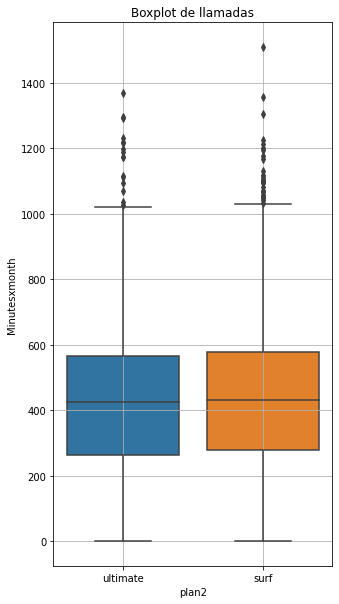

count    2258.000000
mean      435.937555
std       231.972343
min         0.000000
25%       275.000000
50%       429.000000
75%       574.750000
max      1510.000000
Name: Minutesxmonth, dtype: float64

In [35]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
medcalls =  l2
medcalls['plan2']=np.where(medcalls['minutes_included']==3000, 'ultimate', 'surf')
display(medcalls)
vanumerica= 'Minutesxmonth'
variable_categorica= 'plan2'
titulodelgrafico = 'Boxplot de llamadas'

plt.figure(figsize=(5,10))
sns.boxplot(x=variable_categorica, y=vanumerica, data=medcalls)
plt.title(titulodelgrafico)
plt.grid(True)
plt.show()
#ll1['duration'].describe()

#display(ll1)
#print("los datos en funcion del plan surf")
medcalls['Minutesxmonth'].describe()


Interpretación del gráfico
En el gráfico superior podemos ver como se distribuyen las llamadas en los diferentes planes que ofrece la compañia.

En el gráfico vemos que para el plan ultimate, el 50% de la durancion de las llamadas están entre 230 y 570 minutos muy simmular que el plan surf el cual concentra sus datos en este mismo rango.

El segmento que divide la caja en dos partes es la mediana, para este caso ambas medias son muy parecidas lo que indica que la distribución es asimétrica y tanto la media, mediana y moda coinciden.

Adicional al realizar la comparacion de los datos se establece que el plan surf tiene muchos datos atipicos por encima del max, indicando que tienen una buena acogida y uso que el otro plan.


<div class="alert alert-block alert-danger">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>

~~Realizas un buen trabajo en la sección; sin embargo, un aspectos que podrias tener en cuenta es crear lineplots para observar la evolución del tiempo de consumo, de minutos, de llamadas, de internet y de mensajes, e ingresos por plan.~~
    

</div>


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Enterado, se realiza comparativo completo de los dos planes en donde se establece cual ha sido el comportamiento para ambos en sus diferentes servicios , en donde visualmente se puede establecer de manera rapida en el plan surf como es la acogida que tiene en el plan de consumos de datos el cual los cliente deben de pagar un adicional cuando superan lo proporcionado por el plan.
Otra visual que se establece es que en el plan ultimate los usuarios estan acordes a lo que pagan y lo que consumen, en cambio para el plan surf el unico servicio donde presenta un pago adicional es el internet, debe ser por el que tiene mayor acogida por los clientes, por el contrario los de mas servicios se comportan.
    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Buen trabajo Gustavo. 
</div>

'COMPARACION DE PLAN ULTIMATE Y SERVICIOS DURANTE LOS MESES'

,ad_internet,ad_message,ad_minut,usd_monthly_pay
plan,ultimate,ultimate,ultimate,ultimate
month_x,,,,
01,0.000000,0.0,0.0,70
02,0.000000,0.0,0.0,70
03,5.833333,0.0,0.0,70
04,3.666667,0.0,0.0,70
05,0.965517,0.0,0.0,70
06,1.866667,0.0,0.0,70
07,2.135593,0.0,0.0,70
08,3.450704,0.0,0.0,70


'COMPARACION DE PLAN SURF Y SERVICIOS DURANTE LOS MESES'

,ad_internet,ad_message,ad_minut,usd_monthly_pay
plan,surf,surf,surf,surf
month_x,,,,
01,0.000000,0.000000,0.000000,20
02,16.666667,0.026667,1.036667,20
03,27.391304,0.016957,0.706957,20
04,21.000000,0.052200,1.058400,20
05,29.066667,0.128800,1.702800,20
06,29.895833,0.150938,1.617812,20
07,44.083333,0.146500,2.216500,20
08,45.786164,0.183585,1.683396,20


<AxesSubplot:title={'center':'Plan SURF y servicios'}, xlabel='plan mes', ylabel='promedio de ingresos de servicios'>

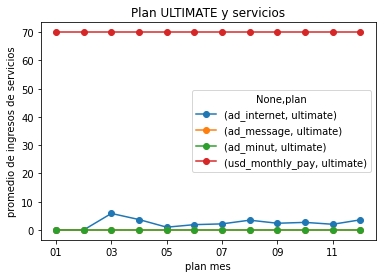

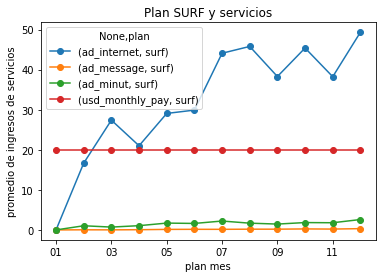

In [36]:
df_ttinf['plan2']=np.where(df_ttinf['minutes_included']==3000, 'ultimate', 'surf')
df_ttinf = pd.DataFrame(df_ttinf)
variable1 = df_ttinf[df_ttinf['plan2']=='ultimate']
#print(variable1)
display("COMPARACION DE PLAN ULTIMATE Y SERVICIOS DURANTE LOS MESES")
exnew1 = variable1.pivot_table(index='month_x', #la columna cuyos valores se convierten en índices en la tabla dinámica;
                            columns='plan', #la columna cuyos valores se convierten en columnas en la tabla dinámica;
                            values=['usd_monthly_pay', 'ad_minut', 'ad_message', 'ad_internet'], #la columna cuyos valores queremos agregar en la tabla dinámica;
                            aggfunc='mean' #la función de agregación que queremos aplicar a los valores en cada grupo de filas y columnas.
                           )

display(exnew1)

exnew1.plot(
        kind='line',
        marker = "o",
        title='Plan ULTIMATE y servicios',
        xlabel='plan mes',
        ylabel='promedio de ingresos de servicios')


variable2 = df_ttinf[df_ttinf['plan2']=='surf']
#print(variable1)
display("COMPARACION DE PLAN SURF Y SERVICIOS DURANTE LOS MESES")
exnew2 = variable2.pivot_table(index='month_x', #la columna cuyos valores se convierten en índices en la tabla dinámica;
                            columns='plan', #la columna cuyos valores se convierten en columnas en la tabla dinámica;
                            values=['usd_monthly_pay', 'ad_minut', 'ad_message', 'ad_internet'], #la columna cuyos valores queremos agregar en la tabla dinámica;
                            aggfunc='mean' #la función de agregación que queremos aplicar a los valores en cada grupo de filas y columnas.
                           )

display(exnew2)

exnew2.plot(
        kind='line',
        marker = "o",
        title='Plan SURF y servicios',
        xlabel='plan mes',
        ylabel='promedio de ingresos de servicios')

### Mensajes

messagexmonth
month_x plan                   
01      surf          10.500000
        ultimate      15.500000
02      surf          12.000000
        ultimate      23.166667
03      surf          15.260870
        ultimate      20.250000
04      surf          17.400000
        ultimate      22.047619
05      surf          24.386667
        ultimate      32.103448
06      surf          25.281250
        ultimate      30.533333
07      surf          27.025000
        ultimate      32.830508
08      surf          28.855346
        ultimate      38.478873
09      surf          30.376963
        ultimate      37.895349
10      surf          33.267241
        ultimate      39.800000
11      surf          32.115523
        ultimate      38.579365
12      surf          38.212219
        ultimate      45.087248

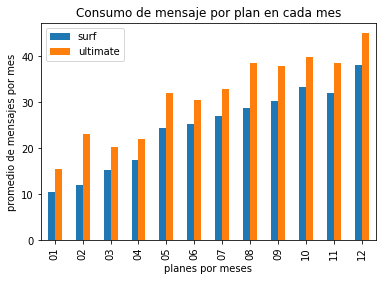

In [37]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
df_ttinfmess = df_ttinf.reindex(['messagexmonth'], axis=1)
#display(df_ttinfcall.head(15))

df_ttinfmess1=df_ttinfmess.groupby(by=["month_x", "plan"])['messagexmonth'].mean()
df_ttinfmess1=pd.DataFrame(df_ttinfmess1)
display(df_ttinfmess1)

mx1 = df_ttinfmess.pivot_table(index='month_x', #la columna cuyos valores se convierten en índices en la tabla dinámica;
                            columns='plan', #la columna cuyos valores se convierten en columnas en la tabla dinámica;
                            values='messagexmonth', #la columna cuyos valores queremos agregar en la tabla dinámica;
                            aggfunc='mean' #la función de agregación que queremos aplicar a los valores en cada grupo de filas y columnas.
                           )


mx1.plot(
        kind='bar',
        title='Consumo de mensaje por plan en cada mes',
        xlabel='planes por meses',
        ylabel='promedio de mensajes por mes')

plt.legend(['surf', 'ultimate'])
plt.show()


In [38]:
# Calcula la media y la varianza del número de mensajes.
medmess =  df_ttinfmess1
#display(medmess)

#media de los mensajes por mes
display('La media mensual de los mensajes es igual a: ')
mediamess=medmess['messagexmonth'].mean()
display(mediamess)

display('La varianza mensual de los mensajes es igual a: ')
variancemess = np.var(medmess['messagexmonth'])
print(variancemess)

#mediana de los mensajes por mes
display('La mediana mensual por los mensajes es igual a: ')
medianamess=medmess['messagexmonth'].median()
display(medianacalls)


'La media mensual de los mensajes es igual a: '

27.956395427723635

'La varianza mensual de los mensajes es igual a: '

86.92319265441147


'La mediana mensual por los mensajes es igual a: '

6.0

messagexmonth  messages_included  \
user_id month_x service plan                                         
1000    12      qmss    ultimate             11               1000   
1001    08      qmss    surf                 30                 50   
        09      qmss    surf                 44                 50   
        10      qmss    surf                 53                 50   
        11      qmss    surf                 36                 50   
...                                         ...                ...   
1496    09      qmss    surf                 21                 50   
        10      qmss    surf                 18                 50   
        11      qmss    surf                 13                 50   
        12      qmss    surf                 11                 50   
1497    12      qmss    ultimate             50               1000   

                                  usd_per_message  ad_message     plan2  
user_id month_x service plan                                             
1000    12      qmss    ultimate             0.01        0.00  ultimate  
1001    08      qmss    surf                 0.03        0.00      surf  
        09      qmss    surf                 0.03        0.00      surf  
        10      qmss    surf                 0.03        0.09      surf  
        11      qmss    surf                 0.03        0.00      surf  
...                                           ...         ...       ...  
1496    09      qmss    surf                 0.03        0.00      surf  
        10      qmss    surf                 0.03        0.00      surf  
        11      qmss    surf                 0.03        0.00      surf  
        12      qmss    surf                 0.03        0.00      surf  
1497    12      qmss    ultimate             0.01        0.00  ultimate  

[1806 rows x 5 columns]

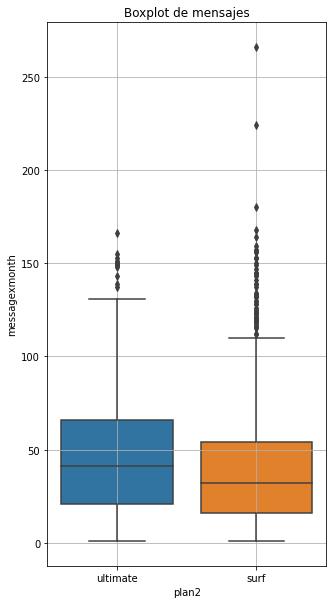

count    1806.000000
mean       42.110188
std        33.122931
min         1.000000
25%        17.000000
50%        34.000000
75%        59.000000
max       266.000000
Name: messagexmonth, dtype: float64

In [39]:
# Traza un diagrama de caja para visualizar la distribución mensual de mensajes
medmessage =  m2
medmessage['plan2']=np.where(medmessage['messages_included']==1000, 'ultimate', 'surf')
display(medmessage)
vanumerica1= 'messagexmonth'
variable_categorica1= 'plan2'
titulodelgrafico1 = 'Boxplot de mensajes'

plt.figure(figsize=(5,10))
sns.boxplot(x=variable_categorica1, y=vanumerica1, data=medmessage)
plt.title(titulodelgrafico1)
plt.grid(True)
plt.show()
m2['messagexmonth'].describe()

#display(ll1)
#print("los datos en funcion del plan surf")
#data1 = ll1[ll1['plan'] == 'surf']
#display(data1)
#data1['duration'].describe()
#print()

#print("los datos en funcion del plan ultimate")
#data2 = ll1[(ll1['plan'] == 'ultimate')]
#data2['duration'].describe()

se evidencia que en el grafico referente al plan ultimate los datos estan muy disperso, lo cual no se presenta en el plan surf ya que los datos estan mucho mas concentrados.

Se presenta que los datos en el plan surf presenta una menor variabilidad en los datos ya que la longitud de la caja es menor que la del plan ultimate.

Ambos graficos presentan que la media esta mas cercana al Q1, indicando que presentan una asimetria positiva y los datos estan sesgado positivamente hacia arriba (derecha), lo que indica que la media es mayor que la mediana y la mediana mayor que la moda.

Se determina que el plan de ultimate es donde se presenta una mayor acogida por parte de los cliente y es nucho mas usado y este va de la mano con la grafica de barras donde se evidencia el aumento de los mensajes en este plan y mayor uso.

Si pudimos analizar que el 3er cuartil del plan surf termina mucho antes que el plan ultimate, lo que nos puede decir que a medida que aumenta los mensajes, tenemos una mayor concentración de personas en el plan de ultimate. También notamos que plan surf presenta muchos más valores atípicos.

### Internet

gbxmonth
user_id month_x plan              
1000    12      ultimate       2.0
1001    08      surf           7.0
        09      surf          14.0
        10      surf          23.0
        11      surf          19.0
        12      surf          20.0
1002    10      surf           7.0
        11      surf          20.0
        12      surf          15.0
1003    12      surf          28.0
1004    05      surf           7.0
        06      surf          21.0
        07      surf          25.0
        08      surf          28.0
        09      surf          19.0

gbxmonth
month_x plan              
01      surf           5.0
        ultimate       8.0
02      surf          13.0
        ultimate      19.0
03      surf          14.0
        ultimate      19.0
04      surf          13.0
        ultimate      17.0
05      surf          15.0
        ultimate      18.0
06      surf          16.0
        ultimate      17.0
07      surf          18.0
        ultimate      17.0
08      surf          18.0
        ultimate      19.0
09      surf          17.0
        ultimate      18.0
10      surf          18.0
        ultimate      19.0
11      surf          17.0
        ultimate      18.0
12      surf          19.0
        ultimate      19.0

plan,surf,ultimate
month_x,,
01,5.0,8.0
02,13.0,19.0
03,14.0,19.0
04,13.0,17.0
05,15.0,18.0
06,16.0,17.0
07,18.0,17.0
08,18.0,19.0
09,17.0,18.0


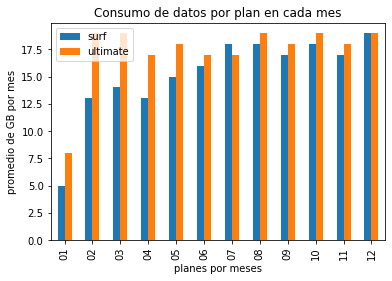

In [40]:
# Comprara el consumo de datos en cada mes por los usuarios de cada plan
df_ttinfinter = df_ttinf.reindex(['gbxmonth'], axis=1)
display(df_ttinfinter.head(15))

df_ttinfinter2=df_ttinfinter.groupby(by=["month_x", "plan"])['gbxmonth'].mean().apply(np.ceil)
df_ttinfinter2=pd.DataFrame(df_ttinfinter2)
display(df_ttinfinter2)

intx1 = df_ttinfinter.pivot_table(index='month_x', #la columna cuyos valores se convierten en índices en la tabla dinámica;
                            columns='plan', #la columna cuyos valores se convierten en columnas en la tabla dinámica;
                            values='gbxmonth', #la columna cuyos valores queremos agregar en la tabla dinámica;
                            aggfunc='mean' #la función de agregación que queremos aplicar a los valores en cada grupo de filas y columnas.
                           ).apply(np.ceil)
display(intx1)

intx1.plot(
        kind='bar',
        title='Consumo de datos por plan en cada mes',
        xlabel='planes por meses',
        ylabel='promedio de GB por mes')

plt.legend(['surf', 'ultimate'])
plt.show()

In [41]:
# Calcula la media y la varianza del consumo de datos.
medinterne =  df_ttinf.reindex(['gbxmonth', 'gb_per_month_included'], axis=1)
display(medinterne)

#media de los mensajes por mes
display('La media mensual del consumo de datos es igual a: ')
medinterne1=medinterne['gbxmonth'].mean()
display(medinterne1)

display('La varianza mensual del consumo de datos es igual a: ')
varianceinter = np.var(medinterne['gbxmonth'])
print(varianceinter)

#mediana de los mensajes por mes
display('La mediana mensual del consumo de datos es igual a: ')
medianaintern=medinterne['gbxmonth'].median()
display(medianaintern)

gbxmonth  gb_per_month_included
user_id month_x plan                                     
1000    12      ultimate       2.0                   30.0
1001    08      surf           7.0                   15.0
        09      surf          14.0                   15.0
        10      surf          23.0                   15.0
        11      surf          19.0                   15.0
...                            ...                    ...
1498    12      surf          24.0                   15.0
1499    09      surf          13.0                   15.0
        10      surf          20.0                   15.0
        11      surf          17.0                   15.0
        12      surf          23.0                   15.0

[2258 rows x 2 columns]

'La media mensual del consumo de datos es igual a: '

17.236049601417182

'La varianza mensual del consumo de datos es igual a: '

61.352163668044575


'La mediana mensual del consumo de datos es igual a: '

17.0

gbxmonth  gb_per_month_included  usd_per_gb  \
user_id month_x service plan                                                    
1000    12      qint    ultimate       2.0                   30.0         7.0   
1001    08      qint    surf           7.0                   15.0        10.0   
        09      qint    surf          14.0                   15.0        10.0   
        10      qint    surf          23.0                   15.0        10.0   
        11      qint    surf          19.0                   15.0        10.0   
...                                    ...                    ...         ...   
1498    12      qint    surf          24.0                   15.0        10.0   
1499    09      qint    surf          13.0                   15.0        10.0   
        10      qint    surf          20.0                   15.0        10.0   
        11      qint    surf          17.0                   15.0        10.0   
        12      qint    surf          23.0                   15.0        10.0   

                                  ad_internet     plan2  
user_id month_x service plan                             
1000    12      qint    ultimate          0.0  ultimate  
1001    08      qint    surf              0.0      surf  
        09      qint    surf              0.0      surf  
        10      qint    surf             80.0      surf  
        11      qint    surf             40.0      surf  
...                                       ...       ...  
1498    12      qint    surf             90.0      surf  
1499    09      qint    surf              0.0      surf  
        10      qint    surf             50.0      surf  
        11      qint    surf             20.0      surf  
        12      qint    surf             80.0      surf  

[2277 rows x 5 columns]

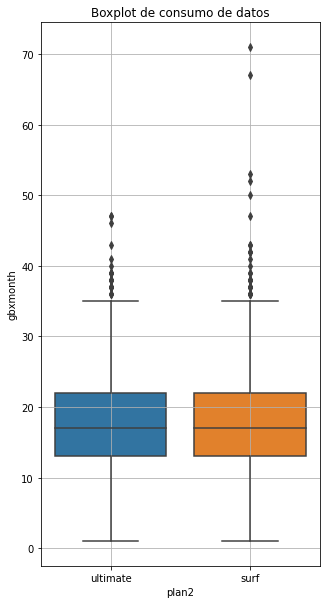

count    2277.000000
mean       17.372859
std         7.869052
min         1.000000
25%        13.000000
50%        17.000000
75%        22.000000
max        71.000000
Name: gbxmonth, dtype: float64

In [42]:
# Traza un diagrama de caja para visualizar la distribución de consumo de datos
medinternet =  i2
#display(medinternet)
medinternet['plan2']=np.where(medinternet['gb_per_month_included']==30, 'ultimate', 'surf')
display(medinternet)
vanumerica2= 'gbxmonth'
variable_categorica2= 'plan2'
titulodelgrafico2 = 'Boxplot de consumo de datos'

plt.figure(figsize=(5,10))
sns.boxplot(x=variable_categorica2, y=vanumerica2, data=medinternet)
plt.title(titulodelgrafico2)
plt.grid(True)
plt.show()
i2['gbxmonth'].describe()

#display(ll1)
#print("los datos en funcion del plan surf")
#data1 = ll1[ll1['plan'] == 'surf']
#display(data1)
#data1['duration'].describe()
#print()

#print("los datos en funcion del plan ultimate")
#data2 = ll1[(ll1['plan'] == 'ultimate')]
#data2['duration'].describe()

se evidencia que en ambos graficos el comportamiento de ambos planes cu comportamiento es muy similar.

Se presenta que los datos en el plan surf presenta una menor variabilidad en los datos ya que la longitud de la caja es menor que la del plan ultimate.

Ambos graficos presentan una distribucion simetrica ya que la mediana de ambos planes se encuentran en mitad de la caja lo que indica que tanto la media, la moda y la mediana son iguales.

Se evidencia una gran cantidad de valores atipicos en el plan surf los cuales estan por encima del valor maximo de la caja.
Se establece que no hay mucha diferencia en los consumos de datos de ambos planes.

## Ingreso

plan,surf,ultimate
month_x,,
01,20.000000,70.000000
02,37.730000,70.000000
03,48.115217,75.833333
04,42.110600,73.666667
05,50.898267,70.965517
06,51.664583,71.866667
07,66.446333,72.135593
08,67.653145,73.450704
09,59.913455,72.360465


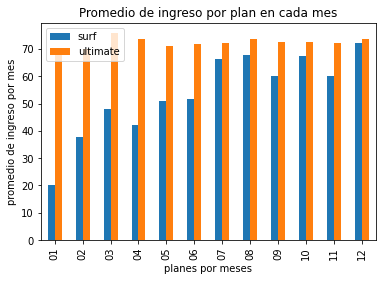

In [43]:
# Comprara el ingreso en cada mes de cada plan

#display(df_ttinfadj.head(15))


df_ttinfadjv1 = df_ttinfadj.reindex(['costtoxmonth'], axis=1)
#display(df_ttinfadjv1.head(15))

df_ttinfadjv2=df_ttinfadjv1.groupby(by=["month_x", "plan"])['costtoxmonth'].mean()
df_ttinfadjv2=pd.DataFrame(df_ttinfadjv2)
#display(df_ttinfadjv2)

costx1 = df_ttinfadjv1.pivot_table(index='month_x', #la columna cuyos valores se convierten en índices en la tabla dinámica;
                            columns='plan', #la columna cuyos valores se convierten en columnas en la tabla dinámica;
                            values='costtoxmonth', #la columna cuyos valores queremos agregar en la tabla dinámica;
                            aggfunc='mean' #la función de agregación que queremos aplicar a los valores en cada grupo de filas y columnas.
                           )
display(costx1)

costx1.plot(
        kind='bar',
        title='Promedio de ingreso por plan en cada mes',
        xlabel='planes por meses',
        ylabel='promedio de ingreso por mes')

plt.legend(['surf', 'ultimate'])
plt.show()

In [44]:
# Calcula la media y la varianza de los ingresos.

#display(df_ttinf)

medingreso =  df_ttinf.reindex(['usd_monthly_pay', 'costtoxmonth'], axis=1)
#display(medingreso)

#media del costo por mes
display('La media del ingreso es igual a: ')
medingreso1=medingreso['costtoxmonth'].mean()
display(medingreso1)

display('La varianza mensual del ingreso es igual a: ')
varianceingreso = np.var(medingreso['costtoxmonth'])
print(varianceingreso)

#mediana de los mensajes por mes
display('La mediana mensual del ingreso es igual a: ')
medianaingreso=medingreso['costtoxmonth'].median()
display(medianaingreso)

'La media del ingreso es igual a: '

66.05443755535873

'La varianza mensual del ingreso es igual a: '

2177.731840804117


'La mediana mensual del ingreso es igual a: '

70.0

usd_monthly_pay  Qcallsxmonth  Minutesxmonth  \
user_id month_x plan                                                     
1000    12      ultimate               70            16            124   
1001    08      surf                   20            27            182   
        09      surf                   20            49            315   
        10      surf                   20            65            393   
        11      surf                   20            64            426   
...                                   ...           ...            ...   
1498    12      surf                   20            39            339   
1499    09      surf                   20            41            346   
        10      surf                   20            53            385   
        11      surf                   20            45            308   
        12      surf                   20            65            496   

                          minutes_included  usd_per_minute  ad_minut  \
user_id month_x plan                                                   
1000    12      ultimate              3000            0.01       0.0   
1001    08      surf                   500            0.03       0.0   
        09      surf                   500            0.03       0.0   
        10      surf                   500            0.03       0.0   
        11      surf                   500            0.03       0.0   
...                                    ...             ...       ...   
1498    12      surf                   500            0.03       0.0   
1499    09      surf                   500            0.03       0.0   
        10      surf                   500            0.03       0.0   
        11      surf                   500            0.03       0.0   
        12      surf                   500            0.03       0.0   

                          messagexmonth  messages_included  usd_per_message  \
user_id month_x plan                                                          
1000    12      ultimate           11.0             1000.0             0.01   
1001    08      surf               30.0               50.0             0.03   
        09      surf               44.0               50.0             0.03   
        10      surf               53.0               50.0             0.03   
        11      surf               36.0               50.0             0.03   
...                                 ...                ...              ...   
1498    12      surf                0.0                0.0             0.00   
1499    09      surf                0.0                0.0             0.00   
        10      surf                0.0                0.0             0.00   
        11      surf                0.0                0.0             0.00   
        12      surf                0.0                0.0             0.00   

                          ad_message  gbxmonth  gb_per_month_included  \
user_id month_x plan                                                    
1000    12      ultimate        0.00       2.0                   30.0   
1001    08      surf            0.00       7.0                   15.0   
        09      surf            0.00      14.0                   15.0   
        10      surf            0.09      23.0                   15.0   
        11      surf            0.00      19.0                   15.0   
...                              ...       ...                    ...   
1498    12      surf            0.00      24.0                   15.0   
1499    09      surf            0.00      13.0                   15.0   
        10      surf            0.00      20.0                   15.0   
        11      surf            0.00      17.0                   15.0   
        12      surf            0.00      23.0                   15.0   

                          usd_per_gb  ad_internet  costtoxmonth     plan2  
user_id month_x plan                                                    

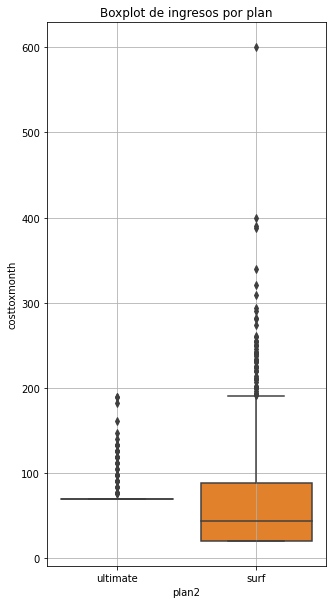

count    2258.000000
mean       66.054438
std        46.676511
min        20.000000
25%        25.512500
50%        70.000000
75%        70.000000
max       600.370000
Name: costtoxmonth, dtype: float64

In [45]:
medingresov1 =  df_ttinf
#display(medingresov1)
medingresov1['plan2']=np.where(medingresov1['usd_monthly_pay']==70, 'ultimate', 'surf')
display(medingresov1)
vanumerica3= 'costtoxmonth'
variable_categorica3= 'plan2'
titulodelgrafico3 = 'Boxplot de ingresos por plan'

plt.figure(figsize=(5,10))
sns.boxplot(x=variable_categorica3, y=vanumerica3, data=medingresov1)
plt.title(titulodelgrafico3)
plt.grid(True)
plt.show()
medingresov1['costtoxmonth'].describe()

#mys_com = df_ttinf[(df_ttinf['plan2'] == 'ultimate')]
#display(mys_com.head(50))

se evidencia que en plan de ultimate los datos son constantes con un valor promedio de 70 usd, lo cual la mayoria de los usuarios acorde a este plan cubren sus necesidades si se presentan valores atipicos pero el rango maximo que llega son de unos $195 por el contrario el comportamiento del plan surf presenta una asimetria positiva ya que esta cercana al Q1 y esta sesgado a positivamente a la derecha.

Se presenta que los datos en el plan surf presenta una mayor variabilidad en los datos ya que la longitud de la caja es mayor que la del plan ultimate.

Se interpreta con base al grafico una gran cantidad de valores atipicos en el plan surf los cuales estan por encima del valor maximo de la caja. el grafico muestra que los clientes de surf pagan un costo mucho debido a consumos adicionales que se presentan en los diferentes servicios, esta informacion reforzada con la grafica de barras refuerza esta conclusion, que a medida del tiempo los cliente pagan mas por el plan de surf debido a los ingresos adicionales, lo cual no sucede con el plan ultimate. 

<div class="alert alert-block alert-danger">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>

~~Realizas un buen trabajo en la sección; sin embargo, hay puntos clave que se deben tener en cuenta para mejorar el proyecto y poder realizar una revisión de mejor manera. Hay algunas gráficas /análisis adicionales que se pueden incluir a la sección, tales como:~~
    
- ~~Crear lineplots para observar la evolución del tiempo de consumo, de minutos, de llamadas, de internet y de mensajes, e ingresos por plan.~~
  
    

~~De resto, muy buen trabajo con el desarrollo de los estudios asociados a cada tabla, buen trabajo Gustavo.~~
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Enterado, se realiza comparativo completo de los dos planes en donde se establece cual ha sido el comportamiento para ambos en sus diferentes servicios , en donde visualmente se puede establecer de manera rapida en el plan surf como es la acogida que tiene en el plan de consumos de datos el cual los cliente deben de pagar un adicional cuando superan lo proporcionado por el plan.
Otra visual que se establece es que en el plan ultimate los usuarios estan acordes a lo que pagan y lo que consumen, en cambio para el plan surf el unico servicio donde presenta un pago adicional es el internet, debe ser por el que tiene mayor acogida por los clientes, por el contrario los de mas servicios se comportan.
    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo.
</div>

<AxesSubplot:title={'center':'Plan SURF y servicios'}, xlabel='plan mes', ylabel='promedio de ingresos de servicios'>

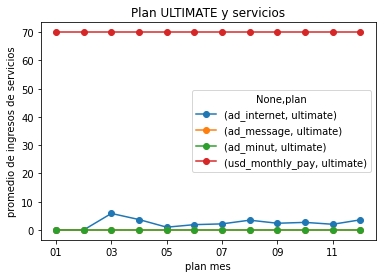

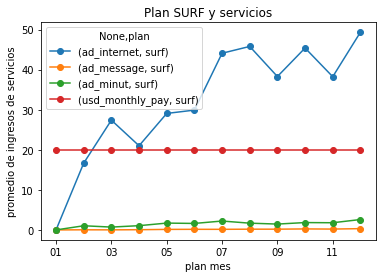

In [46]:

exnew1.plot(
        kind='line',
        marker = "o",
        title='Plan ULTIMATE y servicios',
        xlabel='plan mes',
        ylabel='promedio de ingresos de servicios')



exnew2.plot(
        kind='line',
        marker = "o",
        title='Plan SURF y servicios',
        xlabel='plan mes',
        ylabel='promedio de ingresos de servicios')

## Prueba las hipótesis estadísticas

In [47]:
# Prueba las hipótesis
#H1 = ingresos promedio llamadas ultimate ¡= ingresos promedio llamada surf
#H0 = ingresos promedio llamadas ultimate = ingresos promedio llamada surf
#Las medias de dos poblaciones estadísticas son iguales entre sí. (La hipótesis de dos colas)
#nivel de significación del 0.05
#display(df_ttinf)


df_ttingcall = df_ttinf.reindex([ 'ad_minut', 'minutes_included'], axis=1)
df_ttingcall['plan2']=np.where(df_ttingcall['minutes_included']==3000, 'ultimate', 'surf')
sample_1ultimate= df_ttingcall[df_ttingcall['plan2']=='ultimate']
sample_1ultimate1 = sample_1ultimate['ad_minut']
display(sample_1ultimate1)

sample_2surf= df_ttingcall[df_ttingcall['plan2']=='surf']
sample_2surf1 = sample_2surf['ad_minut']
display(sample_2surf1)

alpha = 0.05  # el nivel de significancia estadística crítica
# si el valor p es menor que alpha, rechazamos la hipótesis

results = st.ttest_ind(sample_1ultimate1, sample_2surf1) # realizar una prueba

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

    

#df_ttinfcall2=df_ttingcall.groupby(by=["month_x", "plan"])['ad_minut'].mean()
#df_ttinfcall2=pd.DataFrame(df_ttinfcall2)
#display(df_ttinfcall2)

user_id  month_x  plan    
1000     12       ultimate    0.0
1006     11       ultimate    0.0
         12       ultimate    0.0
1008     10       ultimate    0.0
         11       ultimate    0.0
                             ... 
1493     09       ultimate    0.0
         10       ultimate    0.0
         11       ultimate    0.0
         12       ultimate    0.0
1497     12       ultimate    0.0
Name: ad_minut, Length: 713, dtype: float64

user_id  month_x  plan
1001     08       surf    0.0
         09       surf    0.0
         10       surf    0.0
         11       surf    0.0
         12       surf    0.0
                         ... 
1498     12       surf    0.0
1499     09       surf    0.0
         10       surf    0.0
         11       surf    0.0
         12       surf    0.0
Name: ad_minut, Length: 1545, dtype: float64

valor p:  1.7721882276535364e-38
Rechazamos la hipótesis nula


El valor p nos dice que aunque los ingresos para los dos planes son diferentes, existe un valor muy bajo de 
probabilidad de obtener aleatoriamente una diferencia de ese tamaño o mayor. Esta probabilidad es claramente 
demasiado alta para concluir que existe una diferencia significativa entre los ingresos

In [48]:
# Prueba las hipótesis
#H1 = ingresos promedio de usuarios NY-NJ ¡= ingreso promedio de otras regiones
#H0 = ingresos promedio de usuarios NY-NJ = ingreso promedio de otras regiones
#La media de una población estadística es mayor que (o menor que) la media de otra población estadística.
#nivel de significación del 0.05
#df_ttinfstate =  df_ttinf
#display(df_ttinfstate.head(30))

df_ttinfstate = pd.merge(df_ttinf, df_users, on=["user_id"], how="left")
#display(df_ttinfstate.head(30))

df_ttinfstate2 = df_ttinfstate.reindex(['costtoxmonth', 'state'], axis=1)
#display(df_ttinfstate2.head(30))


sample_1stateNYNJ= df_ttinfstate2[(df_ttinfstate2['state']=='NY') | (df_ttinfstate2['state'] == 'NJ')]
sample_1stateNYNJ = sample_1stateNYNJ['costtoxmonth']
display(sample_1stateNYNJ)


sample_2other= df_ttinfstate2[(df_ttinfstate2['state']!='NY')| (df_ttinfstate2['state']!= 'NJ')]
sample_2other = sample_2other['costtoxmonth']
display(sample_2other)

alpha = 0.05  # el nivel de significancia estadística crítica
# si el valor p es menor que alpha, rechazamos la hipótesis

results2 = st.ttest_ind(sample_1stateNYNJ, sample_2other) # realizar una prueba

print('valor p: ', results2.pvalue) # extraer el valor p

if results2.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

print()
print("Varianza de los datos de NYNJ")
varianzas1 = sample_1stateNYNJ.var()
print(varianzas1)


print()
print("Varianza de los datos de las otras regiones")
varianzas2 = sample_2other.var()
print(varianzas2)


    
    

354      20.00
355     133.18
356     112.85
357      93.27
358      92.67
359      32.46
450      50.03
451     172.97
452     185.49
453     191.17
454     161.44
900      20.00
901      22.37
902      23.36
1367     20.00
1368    161.20
1369    100.54
1370     20.00
1715     20.00
1716    140.00
1717     90.00
1718     62.37
1719     90.00
1720    110.00
1892     20.00
1893     20.00
1894     20.06
1895     20.00
1896     21.62
Name: costtoxmonth, dtype: float64

0        70.00
1        20.00
2        20.00
3       100.09
4        60.00
         ...  
2253    110.00
2254     20.00
2255     70.00
2256     40.00
2257    100.00
Name: costtoxmonth, Length: 2258, dtype: float64

valor p:  0.22016032722699247
No podemos rechazar la hipótesis nula

Varianza de los datos de NYNJ
3579.4098187192117

Varianza de los datos de las otras regiones
2178.6967197765603


El valor p nos dice que aunque las cantidades promedio para los dos canales son diferentes, existe un 22% de 
probabilidad de obtener ingresos similares entre los estados Ny-NJ contra los otros estados. Esta probabilidad es claramente demasiado alta para concluir que existe una diferencia significativa entre los ingresos de los estados.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
~~Buen trabajo desarrollando las pruebas de hipótesis, mi única observación sobre la sección es desarrollar en profundidad más el análisis de las varianzas, teniendo en cuenta que es un supuesto fundamental a la hora de realizar la pruebas.~~
</div> 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
se establece y validando las varianzas la dispersion que se presentan tanto en la region de NYNJ, donde se establece que al realizar la comparacion con las demas areas, los datos son mucho menos disperson. estableciendo que esta area posee un buen comportamiento con respecto a las otras areas.
    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor #2</b> <a class="tocSkip"></a>
    
Perfecto, buen trabajo Gustavo.
</div>

## Conclusión general

Dando respuesta a la pregunta 
- Tu trabajo es analizar el comportamiento de los clientes: en el plan surf los clientes superan los consumos establecidos para cada servicio ocasionando un pago adicional a estos consumos. Esto se presenta en todos los servicios (llamadas, mensajes e internet).
- determinar qué tarifa de prepago genera más ingresos: aclarando el punto de arriba en el cual se establece que los clientes generan un mayor ingreso por superar lo que estaba establecido en el plan, esto genera que el plan "SURF", sea el plan que genera mayores ingresos al año.

Dando respuestas fundamentales del caso, se procede a detallar como se aborda el caso.
Se da inicio con cargue general de todas las librerias a utilizar y posteriormente se realiza el cargue de todos los archivos externos que tenian la informacion.

A los documentos se realizo lo siguiente:
- Una previsualizacion para establecer que y como se presentan los datos (tipo de variables, datos de relacion entre las tablas y datos comunes o segregacion que se requiera.
- En los datos de las tarifas de los planes se establece una unificacion de variables con el fin de que a medida se desarrollla el producto permite asociar los datos con los demas datos externos.
- En los datos de los usuarios se realizo su validación de extraccion de los estados y el plan que tienen cada uno y por mes, ademas la unificacion de las variables a un mismo tipo.
- En las llamadas se establece un ajuste de las variables y se realiza su aproximacion de acuerdo al uso establecida en los meses. Se realiza una aproximacion de las llamadas al siguiente entero mas cercano, y por ultimo se realiza ajuste a la fecha de uso por cada uno de los meses de consumo.
- En los mensajes se realiza un ajuste de las variables, ajustes de tipos y separacion de fecha.
- En el servicio de internet se realiza ajuste despues a las variables y estos datos se ajustan cuando su analsis ya se mensual.

Posteriormente una vez tratados los datos se unifican para su analisis, los cuales mediante el analis permitira ejecutar a largo plazo, comparacion de informacion y toma de decisiones.
Una vez se realiza la unificacion de los datos se procede con el analsis y determinar el comportamiento de los datos.

- En el plan de llamadas: se establece que el plan Surf tiene una mayor consumo de minutos el cual superando el consumo que proporciona el plan y es por esto genera una mayor ganancia del producto.
- En el plan de mensajes: se establece que el plan Surf supera los datos atipocos en su caja box lo que indica que este plan supera el consumo establecido en el lo ofrecido de cada plan.
- En el plan de interner: se establece que el plan que tiene un mayor ingreso es el surf ya que supera lo establecido en su estandar de consumo, ocasionando un excedente de ingreso.

Por ultimo realizando una verificacion y unificacion de la informacion del ingreso que cada usuario paga por por su plan y a esto adicionarle los ingresos adiconales que se presentan en cada uno de los servicio, se afirma que el plan Surf es el plan que esta generando un mayor ingreso.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Muy buen trabajo con esta sección de conclusiones.
</div> 